<a href="https://colab.research.google.com/github/Inderivator/PlaylistSorter/blob/Playlist-sorter/Etape_finale_AI_Playlist_Sorter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convertir les séquences musicales en spectrogrammes

In [ ]:
from google.colab import drive
import librosa
from librosa.util import fix_length
import numpy as np
import random

# Monter Google Drive
drive.mount('/content/drive', force_remount=True)

# Chemin vers les fichiers audio sur Google Drive
audio_dir = "/content/drive/MyDrive/Playlistsorter/Fichieraudio"

# Fonction pour charger un fichier audio et le convertir en spectrogramme
def load_and_convert_to_spectrogram(audio_file):
    # Charger le fichier audio
    audio_path = f"{audio_dir}/{audio_file}"
    y, sr = librosa.load(audio_path, sr=None)

    # Convertir en spectrogramme
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    return spectrogram

# Liste pour stocker les playlists de spectrogrammes
X_train = []
X_train_shuffled = []

# Charger et convertir les 5 fichiers audio en spectrogrammes
for i in range(1, 6):  # Changer la plage de 1 à 6 pour charger 5 fichiers
    audio_file = f"Fichier{i}.mp3"
    spectrogram = load_and_convert_to_spectrogram(audio_file)

    # Ajouter le spectrogramme à la playlist
    X_train.append(spectrogram)

    # Ajouter le spectrogramme à la playlist mélangée
    X_train_shuffled.append(spectrogram)

Mounted at /content/drive


In [ ]:
# Mélanger aléatoirement l'ordre des spectrogrammes dans la liste X_train_shuffled
random.shuffle(X_train_shuffled)

# Déterminer la longueur maximale des spectrogrammes
max_length = max(spectrogram.shape[1] for spectrogram in X_train)
print(max_length)


# Padding ou troncature des spectrogrammes à la longueur maximale
for i in range(len(X_train)):
    X_train[i] = fix_length(X_train[i], size=max_length)

for i in range(len(X_train_shuffled)):
    X_train_shuffled[i] = fix_length(X_train_shuffled[i], size=max_length)

# Convertir les playlists en un tableau numpy
X_train_array = np.array(X_train)
print(X_train_array)
print(X_train_array.shape)

# Convertir les playlists mélangées en un tableau numpy
X_train_shuffled_array = np.array(X_train_shuffled)
print(X_train_shuffled_array.shape)


36313
[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[3.4630075e-30 1.8736212e-24 6.5240442e-18 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [3.4085398e-30 3.5420683e-24 1.6963514e-17 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [2.2877038e-30 6.7841565e-24 1.8928738e-17 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  ...
  [2.0554107e-37 4.2012503e-30 2.0178428e-27 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]
  [2.0528074e-37 2.8944113e-30

Test affichage spectrogrammes

In [ ]:
import matplotlib.pyplot as plt

# Fonction pour afficher un spectrogramme
def plot_spectrogram(spectrogram):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                             y_axis='mel', fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# Afficher les spectrogrammes
for i, spectrogram in enumerate(spectrogram, 1):
    print(f"Spectrogramme {i}:")
    plot_spectrogram(spectrogram)

Spectrogramme 1:


IndexError: tuple index out of range

<Figure size 1000x400 with 0 Axes>

Padding et troncage (non fonctionnel)

In [ ]:
import numpy as np
import librosa

#Forme théorique du jeu de données
#X_train = [
#    [spectrogram11, spectrogram12, spectrogram13, ...],  # Playlist 1
#    [spectrogram21, spectrogram22, spectrogram23, ...],  # Playlist 2
#    ...
#]

# Déterminer la longueur maximale des spectrogrammes
max_length = max(len(spectrogram) for playlist in X_train for spectrogram in playlist)

# Tronquer les playlists à une longueur maximale de 15 spectrogrammes
for playlist in X_train:
    if len(playlist) > 15:
        playlist = playlist[:15]

# Ajouter du padding aux spectrogrammes si nécessaire
for playlist in X_train:
    for spectrogram in playlist:
        padding_width = max_length - len(spectrogram)
        if padding_width > 0:
            # Ajouter du padding à la fin de chaque spectrogramme
            spectrogram = np.pad(spectrogram, [(0, padding_width), (0, 0)], mode='constant', constant_values=0)

# Ajouter du padding aux playlists pour atteindre une longueur maximale de 15 spectrogrammes
for playlist in X_train:
    padding_width = 15 - len(playlist)
    if padding_width > 0:
        # Ajouter des playlists vides avec du padding
        padding_playlist = np.zeros((padding_width, max_length, len(spectrogram[0])))
        playlist.extend(padding_playlist)

Ajouter CNN feature encoder (Embedding)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def create_cnn_feature_encoder(input_shape):
    model = Sequential()
    model.add(Conv1D(16, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.1))
    return model

input_shape = X_train_array.shape[1:]
cnn_feature_encoder = create_cnn_feature_encoder(input_shape)
input_shape_shuffled = X_train_shuffled_array.shape[1:]
cnn_feature_encoder_shuffled = create_cnn_feature_encoder(input_shape_shuffled)
cnn_feature_encoder.summary()
cnn_feature_encoder_shuffled.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           1743040   
                                                                 
 max_pooling1d (MaxPooling1  (None, 63, 16)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 32)            1568      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 30, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 256)               2

Afficher la taille de l'embedding

In [ ]:
print("Forme de cnn_embeddings :", cnn_feature_encoder.shape)

AttributeError: 'Sequential' object has no attribute 'shape'

Normalisation de l'embedding

In [ ]:
import tensorflow as tf

# Fonction pour normaliser les embeddings de spectrogrammes
def normalize_spectrogram_embeddings(embeddings):
    mean = tf.reduce_mean(embeddings, axis=-1, keepdims=True)
    std = tf.math.reduce_std(embeddings, axis=-1, keepdims=True)
    normalized_embeddings = (embeddings - mean) / std
    return normalized_embeddings

# Utiliser le CNN feature encoder pour extraire les embeddings des spectrogrammes
cnn_embeddings = cnn_feature_encoder.predict(X_train_array)
cnn_embeddings_shuffled = cnn_feature_encoder_shuffled.predict(X_train_shuffled_array)
print(cnn_embeddings.shape)
print(cnn_embeddings_shuffled.shape)
# Normaliser les embeddings des spectrogrammes
cnn_embeddings_normalized = normalize_spectrogram_embeddings(cnn_embeddings)
cnn_embeddings_normalized_shuffled = normalize_spectrogram_embeddings(cnn_embeddings_shuffled)
print(cnn_embeddings_normalized)
print(cnn_embeddings_normalized_shuffled)

1/1 [==============================] - 0s 166ms/step
(5, 256)
(5, 256)
tf.Tensor(
[[-0.6043079  -0.6799544   2.6263971  ...  0.24872983  0.26328525
  -0.66510403]
 [-0.7375756   0.14448084 -0.03147489 ... -0.38765037 -0.13113047
   1.1256063 ]
 [-0.7174008  -0.7174008  -0.7174008  ... -0.7174008   0.01669567
  -0.36103794]
 [-0.60995185 -0.72020096 -0.72020096 ... -0.72020096  0.6960693
  -0.72020096]
 [-0.6994889  -0.6994889  -0.09066016 ...  0.22671595  0.6623619
  -0.4866835 ]], shape=(5, 256), dtype=float32)
tf.Tensor(
[[-0.718919   -0.718919    2.4917257  ... -0.03179738  0.15691097
  -0.7160719 ]
 [-0.6324751  -0.6324751   2.081298   ... -0.6324751  -0.42220965
  -0.6324751 ]
 [-0.72156423 -0.6966745   2.4653206  ...  0.23116782  2.1716535
   0.45670703]
 [-0.36631006 -0.7126349   1.5864726  ...  0.44536567 -0.7126349
   0.95909154]
 [-0.7495717  -0.14695044  1.4631256  ...  0.6828865  -0.4137889
   0.9764417 ]], shape=(5, 256), dtype=float32)


In [ ]:
import matplotlib.pyplot as plt

# Afficher les embeddings
for i in range(3):  # Afficher les trois premiers embeddings
    plt.figure(figsize=(6, 4))
    plt.plot(cnn_embeddings[i])
    plt.title(f"Embedding {i+1}")
    plt.xlabel('Caractéristiques')
    plt.ylabel('Valeur')
    plt.show()

Encodage positionnel v1

In [ ]:
# Fonction pour ajouter l'encodage de position aux embeddings
def positional_encoding(max_len, d_model):
    pos = tf.range(max_len, dtype=tf.float32)[:, tf.newaxis]
    i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]
    angle_rates = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    angle_rads = pos * angle_rates

    # Utilise une opération sinus/cosinus pour encoder les positions
    sines = tf.math.sin(angle_rads[:, 0::2])
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # Concatène les sinus et cosinus pour former l'encodage de position
    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

Encodage positionnel v2 (Meilleure version que la v1)

In [ ]:
import tensorflow as tf
import numpy as np

def positional_encoding(num_positions, d_model):

    pos = tf.range(num_positions, dtype=tf.float32)[:, tf.newaxis]
    i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]
    angle_rates = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    angle_rads = pos * angle_rates

    # Appliquer le sinus aux indices pairs dans le tableau ; 2i
    sines = tf.math.sin(angle_rads[:, 0::2])

    # Appliquer le cosinus aux indices impairs dans le tableau ; 2i+1
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # Concaténer les sinus et les cosinus pour former le codage positionnel
    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[:, tf.newaxis, :]  # (position, 1, d_model)

    return tf.cast(pos_encoding, tf.float32)

# Ajuster num_positions et d_model selon vos dimensions d'incorporation
num_positions = cnn_embeddings_normalized.shape[0]  # Nombre de spectrogrammes
d_model = cnn_embeddings_normalized.shape[-1] # Dimension du modèle
pos_encoding = positional_encoding(num_positions, d_model)
print(pos_encoding.shape)

num_positions_shuffled = cnn_embeddings_normalized_shuffled.shape[0]
d_model_shuffled = cnn_embeddings_normalized_shuffled.shape[-1]
pos_encoding_shuffled = positional_encoding(num_positions_shuffled, d_model_shuffled)
print(pos_encoding_shuffled.shape)

(5, 1, 256)
(5, 1, 256)


On additionne l'encodage positionnel avec les données modifiées avec l'embedding

In [ ]:
# Déterminer la longueur maximale des spectrogrammes après le padding/troncature
# max_length = X_train_array.shape[2]

cnn_embeddings_with_position = cnn_embeddings_normalized + pos_encoding
cnn_embeddings_with_position_shuffled = cnn_embeddings_normalized_shuffled + pos_encoding_shuffled
# Vérifier la forme des embeddings avec l'encodage de position
print("Forme des embeddings avec encodage de position :", cnn_embeddings_with_position.shape)
print("Forme des embeddings avec encodage de position shuffled :", cnn_embeddings_with_position_shuffled.shape)

Forme des embeddings avec encodage de position : (5, 5, 256)
Forme des embeddings avec encodage de position shuffled : (5, 5, 256)


Créer un masque d'attention ? (étape non nécessaire)

In [ ]:
#Exemple théorique :
#def create_padding_mask(seq):
#    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    # Ajoute une dimension supplémentaire pour indiquer la séquence de padding
#    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)


On définit les paramètres de l'encodeur

In [ ]:
from tensorflow.keras import layers, Model

def transformer_encoder(num_heads, key_dim, d_model, num_positions, dropout_rate=0.1):
    inputs = layers.Input(shape=(num_positions, d_model))

    # Multi-Head Attention 1
    attention_output1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    attention_output1 = layers.Dropout(dropout_rate)(attention_output1)
    attention_output1 = layers.LayerNormalization(epsilon=1e-6)(attention_output1 + inputs)

    # Position-wise Feed-Forward Network
    outputs = layers.Dense(d_model, activation='relu')(attention_output1)
    outputs = layers.Dropout(dropout_rate)(outputs)
    outputs = layers.LayerNormalization(epsilon=1e-6)(outputs + attention_output1)
    return Model(inputs=inputs, outputs=outputs)

# Exemple d'utilisation
encoder_model = transformer_encoder(num_heads=8, key_dim=64, d_model=d_model, num_positions=num_positions)
encoder_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 256)]             0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 5, 256)               526080    ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout_2 (Dropout)         (None, 5, 256)               0         ['multi_head_attention[0][0]']
                                                                                                  
 tf.__operators__.add (TFOp  (None, 5, 256)               0         ['dropout_2[0][0]',       

On définit les paramètres du décodeur

In [ ]:
from tensorflow.keras import layers, Model

def transformer_decoder(num_heads, key_dim, d_model_shuffled, num_positions_shuffled, dropout_rate=0.1):
    inputs = layers.Input(shape=(num_positions_shuffled, d_model_shuffled))

    # Multi-Head Attention 1
    attention_output1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    attention_output1 = layers.Dropout(dropout_rate)(attention_output1)
    attention_output1 = layers.LayerNormalization(epsilon=1e-6)(attention_output1 + inputs)

    # Multi-Head Attention 2
    encoder_output = layers.Input(shape=(num_positions, d_model))  # Ajouter l'entrée de l'encodeur ici
    attention_output2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(attention_output1, encoder_output)
    attention_output2 = layers.Dropout(dropout_rate)(attention_output2)
    attention_output2 = layers.LayerNormalization(epsilon=1e-6)(attention_output2 + attention_output1)

    # Position-wise Feed-Forward Network
    outputs = layers.Dense(d_model, activation='relu')(attention_output2)
    outputs = layers.Dropout(dropout_rate)(outputs)
    outputs = layers.LayerNormalization(epsilon=1e-6)(outputs + attention_output2)

    # Ajout d'une couche de sortie pour trier les embeddings
    sorted_outputs = layers.Dense(d_model, activation='relu')(outputs)
    sorted_outputs = layers.Dense(d_model, activation='relu')(sorted_outputs)
    sorted_outputs = layers.Dense(num_positions_shuffled, activation='softmax')(sorted_outputs)

    return Model(inputs=[inputs, encoder_output], outputs=sorted_outputs)

# Exemple d'utilisation
decoder_model = transformer_decoder(num_heads=8, key_dim=64, d_model_shuffled=d_model_shuffled, num_positions_shuffled=num_positions_shuffled)
decoder_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 5, 256)]             0         []                            
                                                                                                  
 multi_head_attention_1 (Mu  (None, 5, 256)               526080    ['input_2[0][0]',             
 ltiHeadAttention)                                                   'input_2[0][0]']             
                                                                                                  
 dropout_4 (Dropout)         (None, 5, 256)               0         ['multi_head_attention_1[0][0]
                                                                    ']                            
                                                                                            

On construit le modèle complet (travail en cours)

In [ ]:
#Construction du modèle complet
num_layers = 2
num_heads = 4
ff_dim = 256
dropout_rate = 0.1

encoder_model = encoder(
    num_layers=num_layers,
    num_heads=num_heads,
    ff_dim=ff_dim,
    input_shape=(sequence_length, num_features),  # sequence_length et num_features à définir
    dropout_rate=dropout_rate,
)


Compilation du modèle

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import tensorflow.keras.metrics
# Compilation de l'encodeur
encoder_model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['accuracy'])

# Compilation du decodeur
decoder_model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['accuracy'])

Entrainement du modèle

In [ ]:
print(cnn_embeddings_normalized)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.1282 - accuracy: 0.6000
Epoch 2/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1414 - accuracy: 0.4000
Epoch 3/200
1/1 [==============================] - 0s 26ms/step - loss: 0.1317 - accuracy: 0.6400
Epoch 4/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1372 - accuracy: 0.6400
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1391 - accuracy: 0.4400
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 0.1373 - accuracy: 0.7600
Epoch 7/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1311 - accuracy: 0.7600
Epoch 8/200
1/1 [==============================] - 0s 25ms/step - loss: 0.1295 - accuracy: 0.8400
Epoch 9/200
1/1 [==============================] - 0s 22ms/step - loss: 0.1359 - accuracy: 0.6400
Epoch 10/200
1/1 [==============================] - 0s 24ms/step - loss: 0.1239 - accuracy: 0.5600
Epoch 11/200
1/1 [===

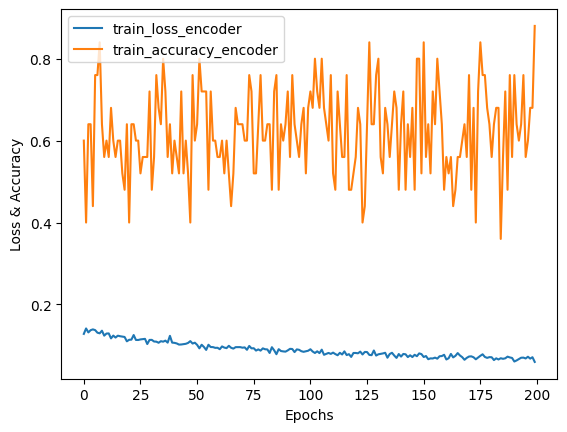

In [ ]:
# Importer les modèles
import tensorflow as tf
from tensorflow.keras.models import Model

# Définir les données d'entraînement
X_train_encoder = cnn_embeddings_with_position
X_train_decoder = cnn_embeddings_with_position_shuffled

# Il n'y a pas de données labelisées pour cette configuration
y_train = None

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_encoder, x_decoder, batch_size):
        self.x_encoder = x_encoder
        self.x_decoder = x_decoder
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.x_encoder))

    def __len__(self):
        return len(self.x_encoder) // self.batch_size

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        x_encoder_batch = tf.gather(self.x_encoder, indexes)
        x_decoder_batch = tf.gather(self.x_decoder, indexes)
        return [x_encoder_batch, x_decoder_batch], None

# Batch size adapté selon la taille des données
batch_size = 5  # Vous avez seulement 5 spectrogrammes

# Nombre d'époques
epochs = 200


# Créer une instance du générateur de données pour l'ensemble des données
train_generator = DataGenerator(X_train_encoder, X_train_decoder, batch_size)

# Compiler le modèle en spécifiant la métrique d'accuracy
encoder_model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['accuracy'])

# Entraîner le modèle en utilisant le générateur de données pour l'ensemble des données
history_encoder = encoder_model.fit(
    train_generator,
    epochs=epochs,
)

# Afficher les courbes d'apprentissage pour l'encoder
plt.plot(history_encoder.history['loss'], label='train_loss_encoder')
plt.plot(history_encoder.history['accuracy'], label='train_accuracy_encoder')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()


In [ ]:
# Compiler le modèle en spécifiant la métrique d'accuracy
decoder_model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['accuracy'])

# Entraîner le modèle du décodeur en utilisant le générateur de données pour l'ensemble des données
history_decoder = decoder_model.fit(
    train_generator,
    epochs=epochs,
)

# Afficher les courbes d'apprentissage pour le décodeur
plt.plot(history_decoder.history['loss'], label='train_loss_decoder')
plt.plot(history_decoder.history['accuracy'], label='train_accuracy_decoder')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()

Epoch 1/200


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_1" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, None, None) dtype=float32>]


Evaluation du modèle

In [ ]:
#Insérer code ici

Inférence du modèle

In [ ]:
# Stratégie à adopter :

# 1. Passer l'embedding de la nouvelle playlist dans le décodeur pour obtenir la sortie triée
sorted_embedding = decoder_model.predict([new_playlist_embedding, encoder_output])

# 2. Utiliser la sortie triée pour réordonner les spectrogrammes dans la nouvelle playlist
# Supposons que sorted_embedding contient les embeddings triés, on utilise les indices des valeurs triées pour réordonner les spectrogrammes
sorted_indices = np.argsort(sorted_embedding.flatten())  # Appliquer flatten pour s'assurer que les indices sont correctement triés
sorted_playlist = [new_playlist[i] for i in sorted_indices]


Sauvegarder le modèle

In [ ]:
#Insérer code ici